# 1. Install Dependencies and Setup

In [1]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
aiohttp                      3.8.3
aiosignal                    1.2.0
argon2-cffi                  20.1.0
astor                        0.8.1
astunparse                   1.6.3
async-timeout                4.0.2
asynctest                    0.13.0
attrs                        22.1.0
backcall                     0.2.0
bleach                       4.1.0
blinker                      1.4
brotlipy                     0.7.0
cached-property              1.5.2
cachetools                   5.3.1
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.2.0
clang                        5.0
click                        8.0.4
colorama                     0.4.6
cryptography                 39.0.1
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.1
defusedxml                   0.7.1
entrypoi

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
pip install opencv-python==4.6.0.66

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\seika\appdata\local\programs\python\python311\lib\site-packages\tortoise-2.4.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [7]:
import cv2
import imghdr

C:\Users\seika\AppData\Local\Temp\ipykernel_26052\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 317 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

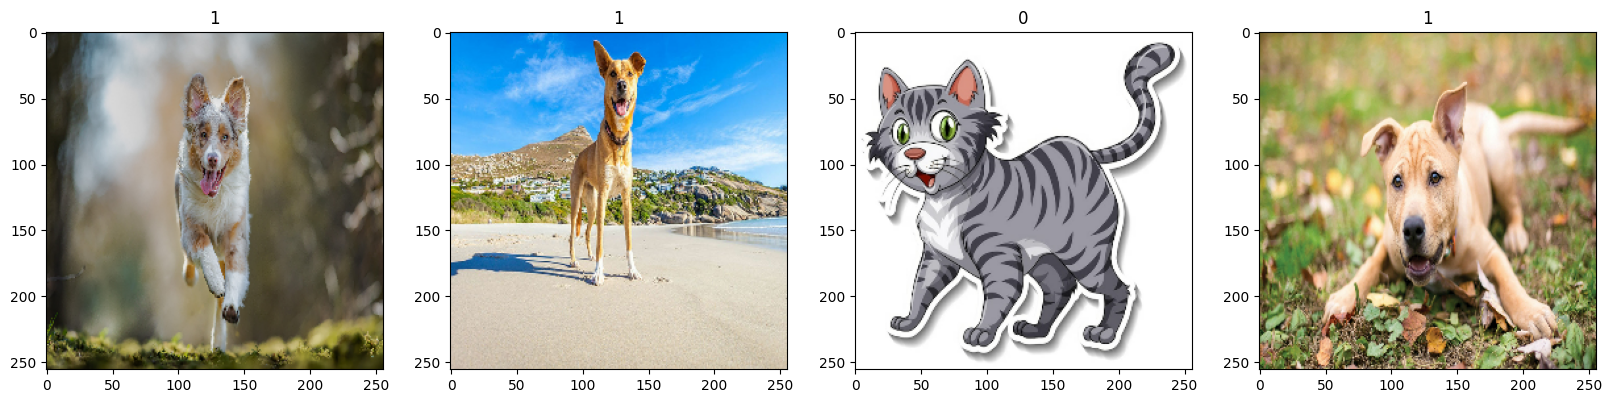

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          ...,
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01]],
 
         [[9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          ...,
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01]],
 
         [[9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          ...,
          [9.96078432e-01, 9.96078432e-01, 9.9607

# 5. Split Data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

7

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 8s 848ms/step - loss: 0.8046 - accuracy: 0.5536 - val_loss: 0.6669 - val_accuracy: 0.6562
Epoch 2/20
7/7 [==============================] - 7s 859ms/step - loss: 0.6453 - accuracy: 0.6429 - val_loss: 0.6975 - val_accuracy: 0.5781
Epoch 3/20
7/7 [==============================] - 7s 843ms/step - loss: 0.5991 - accuracy: 0.6518 - val_loss: 0.7611 - val_accuracy: 0.6719
Epoch 4/20
7/7 [==============================] - 7s 847ms/step - loss: 0.5789 - accuracy: 0.6964 - val_loss: 0.5559 - val_accuracy: 0.7344
Epoch 5/20
7/7 [==============================] - 8s 859ms/step - loss: 0.5676 - accuracy: 0.7054 - val_loss: 0.5725 - val_accuracy: 0.6250
Epoch 6/20
7/7 [==============================] - 7s 853ms/step - loss: 0.5090 - accuracy: 0.7634 - val_loss: 0.5230 - val_accuracy: 0.7344
Epoch 7/20
7/7 [==============================] - 7s 839ms/step - loss: 0.4346 - accuracy: 0.8170 - val_loss: 0.3901 - val_accuracy: 0.8438
Epoch 8/20
7/7 [====

# 8. Plot Performance

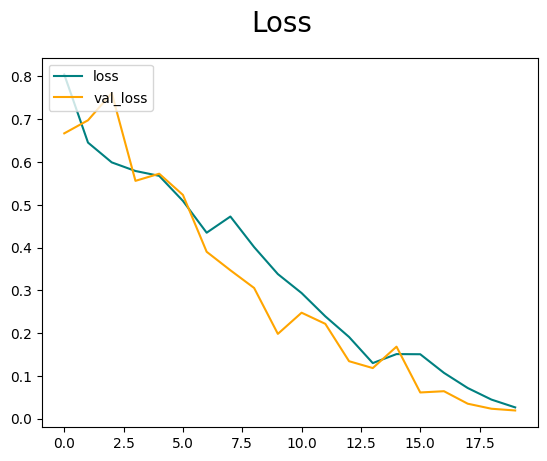

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

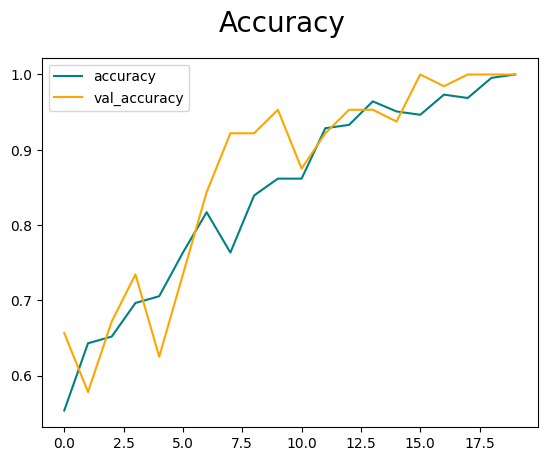

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [8]:
import cv2

In [9]:
img = cv2.imread('tester2.jpg')
plt.imshow(img)
plt.show()

NameError: name 'plt' is not defined

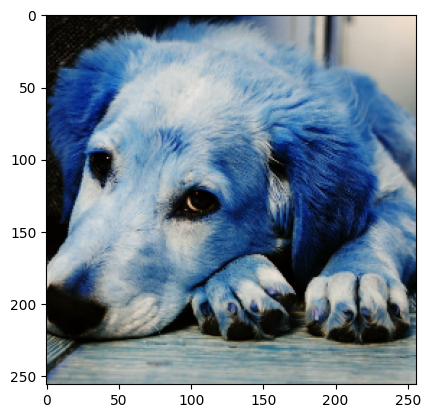

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


In [55]:
yhat

array([[0.998467]], dtype=float32)

In [56]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Dog


# 11. Save the Model

In [2]:
from tensorflow.keras.models import load_model

In [61]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
# 12. Run sht

In [3]:
new_model = load_model('models/imageclassifier.h5')

In [15]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import cv2

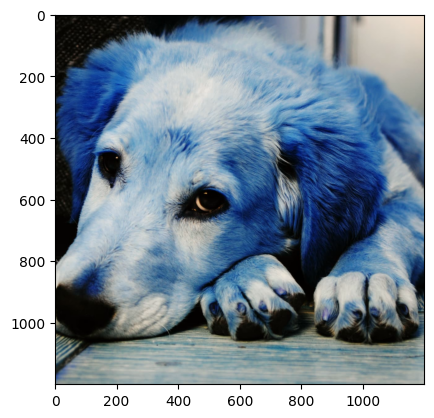

In [16]:
img = cv2.imread('tester2.jpg')
plt.imshow(img)
plt.show()

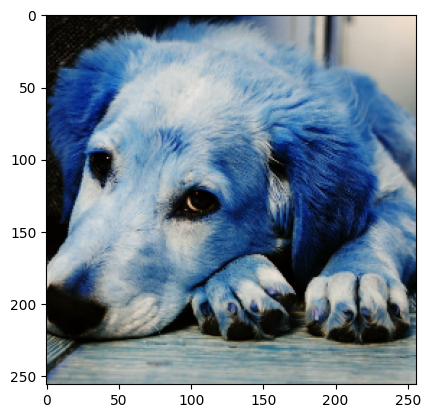

In [17]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [19]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 105ms/step


In [21]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Dog


In [23]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


array([[0.998467]], dtype=float32)